# **SISTEMA PREDICTOR DE GRUPOS RELACIONADOS POR EL DIAGNÓSTICO**

---

**Autores:**
- Alejandro Agudelo Tamayo  
- Cristian Tamayo Arango  
- Daniel Palacio Álvarez  


---

In [28]:
# ----------------------------
# MONTAJE Y LECTURA DEL ARCHIVO
# ----------------------------

# Monta Google Drive para acceder al archivo desde Colab
from google.colab import drive
drive.mount('/content/drive')

# Librerías para manipulación de datos y modelos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el archivo Excel que contiene la base de datos
file_path = '/content/drive/MyDrive/Colab Notebooks/dabe de datos.xlsx/dabe de datos.xlsx'
df = pd.read_excel(file_path)

# Limpieza inicial de nombres de columnas
df.columns = df.columns.str.strip()


# Librerías para integración con Django
import joblib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
# **EXPLORACIÓN INICIAL DEL DATASET (EDA BÁSICO)**

### Exploración Inicial del Dataset

Esta sección tiene como objetivo entender la estructura y calidad de los datos. Se revisarán las primeras filas del dataset, su tamaño, los tipos de datos de cada columna, los valores nulos y algunas estadísticas básicas. Esto permite decidir cómo abordar el preprocesamiento y selección de variables.


In [29]:
# Primeras filas
print("Primeras filas del dataset:")
display(df.head())

# Tamaño del dataset
print(f"\nNúmero de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")


Primeras filas del dataset:


,Num caso,Aseguradora -Código-,Aseguradora -Descripción-,Edad,Grupo Edad,Sexo,Codigo de ciudad,Fecha de ingreso,Tipo de ingreso,Fecha de egreso,...,Proc28,Proc29,Proc30,Tipo servicio,Causa Basica de muerte,Infecciones,Infección Quirurgica,GRD -Código,GRD -Descripción,Tipo GRD
0,413799.0,204,Aseguradora_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,412359.0,313,Aseguradora_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,Aseguradora_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,Aseguradora_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,Aseguradora_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M



Número de filas: 27869
Número de columnas: 68


### Tipos de datos

Aquí se muestran los tipos de datos de todas las columnas. Es importante confirmar que las fechas, variables categóricas y numéricas estén correctamente identificadas.


In [30]:
# Tipos de datos
df_dtypes = df.dtypes
display(df_dtypes.value_counts())
display(df_dtypes)


,count
float64,31
object,27
int64,10


,0
Num caso,float64
Aseguradora -Código-,int64
Aseguradora -Descripción-,object
Edad,int64
Grupo Edad,object
...,...
Infecciones,object
Infección Quirurgica,object
GRD -Código,int64
GRD -Descripción,object


### Valores nulos por columna

Se identifican las columnas con valores faltantes. Algunas de estas pueden tener tantos nulos que será mejor descartarlas o imputarlas.


,0
Dxr 10,27868
Proc30,27864
Proc29,27860
Proc28,27854
Proc27,27849
Proc26,27846
Proc25,27843
Proc24,27838
Proc23,27830
Proc22,27820


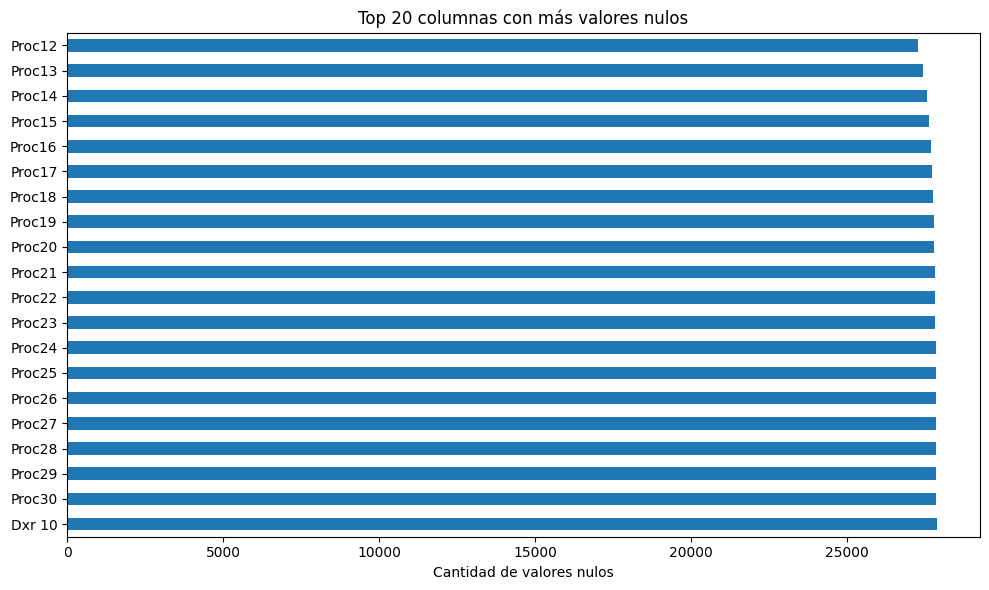

In [31]:
# Valores nulos por columna
nulos = df.isnull().sum()
nulos = nulos[nulos > 0].sort_values(ascending=False)
display(nulos)

# Gráfico de columnas con más nulos
plt.figure(figsize=(10,6))
nulos.head(20).plot(kind='barh')
plt.title("Top 20 columnas con más valores nulos")
plt.xlabel("Cantidad de valores nulos")
plt.tight_layout()
plt.show()


### Estadísticas descriptivas de variables numéricas

En esta sección se presentan estadísticas como media, mediana, desviación estándar, valores mínimos y máximos para todas las variables numéricas. Este análisis es útil para detectar valores atípicos o escalas inadecuadas.


In [32]:
# Estadísticas básicas
estadisticas = df.describe(include=[np.number])
display(estadisticas)


,Num caso,Aseguradora -Código-,Edad,Codigo de ciudad,Fecha de ingreso,Fecha de egreso,Días estancia,ServicioAlta,Días de Unidad Cuidado Intensivo,Dx de ingreso,...,Proc22,Proc23,Proc24,Proc25,Proc26,Proc27,Proc28,Proc29,Proc30,GRD -Código
count,27868.000000,27869.000000,27869.000000,27869.000000,2.786900e+04,2.786900e+04,27869.000000,27869.000000,27869.000000,27869.000000,...,49.000000,39.000000,31.000000,26.000000,23.000000,20.000000,15.000000,9.000000,5.000000,27869.000000
mean,304717.674429,215.182748,57.733252,6008.471240,1.588694e+07,1.593300e+07,8.452295,70.891385,0.380782,1.981592,...,83.357755,88.471282,84.325484,86.547308,85.236957,88.773000,89.300000,88.452222,88.858000,76255.340342
std,128884.481519,74.029533,24.175389,7230.207987,8.744526e+06,8.759840e+06,9.219085,69.737740,2.990207,0.134422,...,18.645962,1.775939,18.091658,9.962655,11.410110,1.601414,3.081234,0.245702,0.657853,45781.914942
min,89751.000000,1.000000,0.000000,5001.000000,1.012005e+06,1.012005e+06,0.000000,20.000000,0.000000,1.000000,...,0.680000,86.220000,0.680000,38.030000,38.050000,87.030000,87.030000,88.010000,88.210000,11011.000000
25%,161048.750000,204.000000,42.000000,5001.000000,8.102005e+06,8.112005e+06,3.000000,24.000000,0.000000,2.000000,...,88.020000,87.410000,88.135000,88.062500,88.120000,88.255000,87.830000,88.380000,88.270000,44173.000000
50%,411519.000000,227.000000,63.000000,5001.000000,1.604200e+07,1.605200e+07,6.000000,40.000000,0.000000,2.000000,...,88.380000,88.290000,88.380000,88.380000,88.380000,88.380000,88.380000,88.380000,88.720000,64171.000000
75%,413188.000000,227.000000,77.000000,5101.000000,2.311200e+07,2.312200e+07,10.000000,126.000000,0.000000,2.000000,...,88.760000,88.765000,88.770000,88.790000,88.950000,88.785000,88.775000,88.720000,89.510000,104103.000000
max,414807.000000,325.000000,109.000000,88564.000000,3.112200e+07,3.112200e+07,174.000000,297.000000,92.000000,2.000000,...,96.710000,96.720000,96.720000,93.080000,89.510000,93.080000,96.720000,88.770000,89.580000,224123.000000


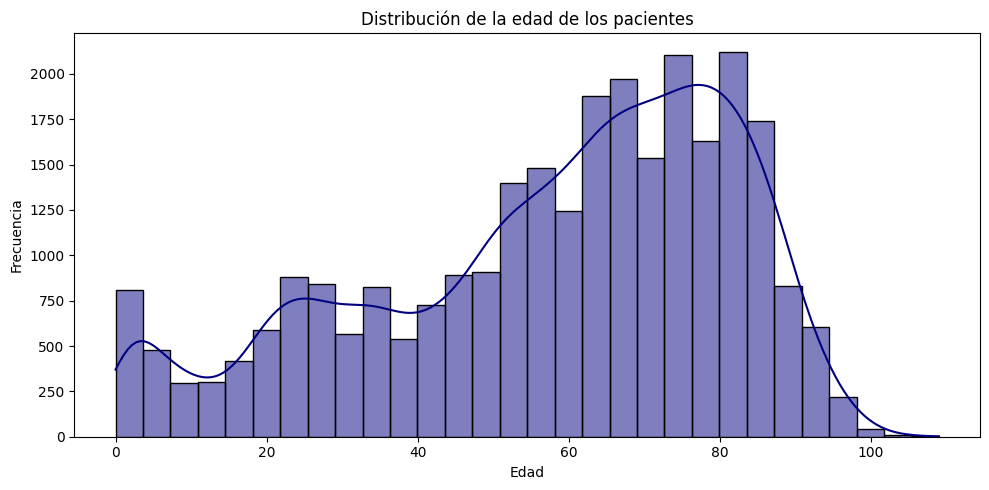

In [33]:
# Distribución de la edad
plt.figure(figsize=(10,5))
sns.histplot(df['Edad'], bins=30, kde=True, color='navy')
plt.title("Distribución de la edad de los pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


### Distribución de la variable objetivo (GRD -Código)

A continuación se muestra cuántos casos hay por cada grupo relacionado al diagnóstico (GRD). Esto ayuda a identificar si existe desbalance en la variable objetivo.


In [34]:
# Conteo de GRD
conteo_grd = df['GRD -Código'].value_counts()
display(conteo_grd.head(10))


,count
GRD -Código,
44173,732
114122,691
54123,631
44163,578
114123,433
14221,363
44162,354
114102,291
114131,286


/tmp/ipython-input-35-2493978727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_grd.head(10).values, y=conteo_grd.head(10).index, palette="Reds_r")


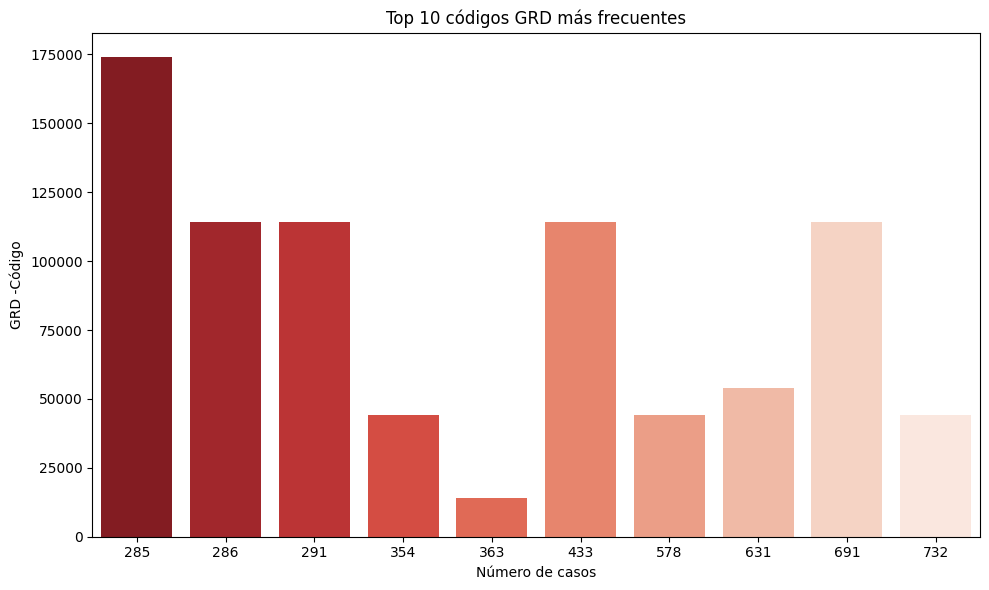

In [35]:
# Gráfica del top 10 GRD
plt.figure(figsize=(10,6))
sns.barplot(x=conteo_grd.head(10).values, y=conteo_grd.head(10).index, palette="Reds_r")
plt.title("Top 10 códigos GRD más frecuentes")
plt.xlabel("Número de casos")
plt.ylabel("GRD -Código")
plt.tight_layout()
plt.show()


### Relación entre GRD -Código y GRD -Descripción

Esta tabla permite entender qué significa cada código GRD. Se muestran las combinaciones únicas entre código y descripción.


In [36]:
relacion_grd = df[['GRD -Código', 'GRD -Descripción']].drop_duplicates().sort_values(by='GRD -Código')
display(relacion_grd.head(10))


,GRD -Código,GRD -Descripción
6067,11011,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES
168,11012,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES w/CC
71,11013,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES w/MCC
1393,11101,PH CRANEOTOMÍA
88,11102,PH CRANEOTOMÍA w/CC
13,11103,PH CRANEOTOMÍA w/MCC
27200,11111,PH PROCEDIMIENTOS DE DERIVACIÓN VENTRICULAR
1456,11112,PH PROCEDIMIENTOS DE DERIVACIÓN VENTRICULAR w/CC
3311,11113,PH PROCEDIMIENTOS DE DERIVACIÓN VENTRICULAR w/MCC
6259,11121,PH PROCEDIMIENTOS VASCULARES EXTRACRANEALES


### Selección y procesamiento de columnas relevantes

En esta sección se seleccionan las variables que pueden ser útiles para la predicción del GRD. También se realiza la limpieza y transformación de datos: fechas, categóricas y nulos.


In [37]:
# Selección de columnas útiles
columnas_utiles = [
    'Aseguradora -Código-', 'Edad', 'Sexo',
    'Tipo de ingreso', 'Fecha de ingreso',
    'Días estancia', 'ServicioAlta', 'Cuidados intensivos',
    'Días de Unidad Cuidado Intensivo',
    'Dx de ingreso', 'Dx principal de egreso .1',
    'Dxr 1', 'Dxr 2', 'Dxr 3', 'Dxr 4', 'Dxr 5', 'Dxr-6',
    'Código causa externa', 'Situacion al alta',
    'Proc1', 'Proc2', 'Proc3',
    'Tipo servicio', 'Infecciones', 'Infección Quirurgica',
    'GRD -Código'
]
df_triaje = df[columnas_utiles].copy()


### Transformación de la fecha de ingreso

Se convierte la columna de fecha de ingreso al formato datetime y se extraen nuevas variables útiles como el mes y el día de la semana.


In [38]:
df['Fecha de ingreso'] = pd.to_datetime(df['Fecha de ingreso'], format='%d%m%Y', errors='coerce')
df_triaje['Mes ingreso'] = df['Fecha de ingreso'].dt.month
df_triaje['Día semana ingreso'] = df['Fecha de ingreso'].dt.dayofweek
df_triaje.drop(columns='Fecha de ingreso', inplace=True)


### Eliminación de registros con datos faltantes en columnas clave

Se eliminan registros que no tienen información crítica como aseguradora, edad, sexo, tipo de ingreso, diagnóstico o el código GRD.


In [40]:
columnas_obligatorias = [
    'Aseguradora -Código-', 'Edad', 'Sexo',
    'Tipo de ingreso', 'Dx de ingreso', 'GRD -Código'
]
df_triaje.dropna(subset=columnas_obligatorias, inplace=True)


### Normalización de variables categóricas

Para evitar inconsistencias en las categorías, se convierte el texto a minúsculas.


In [41]:
columnas_categoricas = [
    'Sexo', 'Tipo de ingreso', 'ServicioAlta',
    'Cuidados intensivos', 'Dx de ingreso', 'Dx principal de egreso .1',
    'Dxr 1', 'Dxr 2', 'Dxr 3', 'Dxr 4', 'Dxr 5', 'Dxr-6',
    'Código causa externa', 'Situacion al alta',
    'Proc1', 'Proc2', 'Proc3', 'Tipo servicio', 'Infecciones', 'Infección Quirurgica'
]

for col in columnas_categoricas:
    df_triaje[col] = df_triaje[col].astype(str).str.lower()


### Eliminación de nulos restantes y filtrado por frecuencia de GRD

Solo se conservan registros completos y clases GRD con al menos 270 muestras, para evitar que clases poco representadas afecten el modelo.


In [42]:
df_triaje.dropna(inplace=True)

# Filtrado de clases con pocas muestras
conteo_final = df_triaje['GRD -Código'].value_counts()
clases_validas = conteo_final[conteo_final >= 270].index
df_filtrado = df_triaje[df_triaje['GRD -Código'].isin(clases_validas)].copy()


### Codificación de variables categóricas y división del dataset

Se codifican las variables categóricas usando One-Hot Encoding para poder usarlas en modelos de Machine Learning. Luego, se separan los datos en conjunto de entrenamiento y prueba de forma estratificada para mantener la distribución de clases.


In [43]:
# Codificación One-Hot
df_codificado = pd.get_dummies(df_filtrado, columns=columnas_categoricas)

# Variables predictoras (X) y objetivo (y)
X = df_codificado.drop(columns='GRD -Código')
y = df_codificado['GRD -Código']

# División estratificada
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificación de tamaños
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Número de clases finales:", y.nunique())


Tamaño X_train: (3700, 3715)
Tamaño X_test: (926, 3715)
Número de clases finales: 10


In [49]:
# Cantidad total de datos originales
total_datos = 27869

# Cantidad de datos después del filtrado
datos_filtrados = df_filtrado.shape[0]

# Porcentaje de datos retenidos
porcentaje_retenido = (datos_filtrados / total_datos) * 100

# Mostrar el resultado
print(f"Datos retenidos después del filtrado: {datos_filtrados} de {total_datos}")
print(f"Porcentaje de datos utilizados: {porcentaje_retenido:.2f}%")

Datos retenidos después del filtrado: 4626 de 27869
Porcentaje de datos utilizados: 16.60%


### Entrenamiento del modelo Random Forest

Se entrena un modelo Random Forest usando hiperparámetros definidos. Este modelo es adecuado para clasificación multiclase y permite interpretar la importancia de cada variable.


In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=2000,
    max_depth=None,
    min_samples_split=15,
    min_samples_leaf=1,
    max_features='log2',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

print("Entrenando modelo Random Forest...")
rf_model.fit(X_train, y_train)


Entrenando modelo Random Forest...


RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_split=15, n_estimators=2000, n_jobs=-1,
                       random_state=42)

### Evaluación del modelo: Precisión y métricas

Se calcula la precisión del modelo en entrenamiento y prueba, y se presentan métricas detalladas para las clases más frecuentes.


In [45]:
from sklearn.metrics import classification_report

# Precisión
print(f"Precisión entrenamiento: {rf_model.score(X_train, y_train):.4f}")
print(f"Precisión prueba: {rf_model.score(X_test, y_test):.4f}")

# Reporte de métricas
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
df_report = pd.DataFrame(report).transpose()

# Top 10 clases
top_classes = df_report.loc[df_report.index.str.isnumeric()].sort_values(by='support', ascending=False).head(10)
display(top_classes[['precision', 'recall', 'f1-score', 'support']].round(2))


Precisión entrenamiento: 0.9997
Precisión prueba: 0.8920


,precision,recall,f1-score,support
44173,0.99,0.98,0.99,146.0
114122,0.78,0.89,0.83,138.0
54123,0.98,0.98,0.98,126.0
44163,0.83,0.82,0.82,115.0
114123,0.79,0.58,0.67,86.0
14221,0.96,1.00,0.98,73.0
44162,0.70,0.73,0.71,70.0
114102,0.96,0.93,0.95,58.0
114131,0.97,1.00,0.98,57.0
174133,1.00,1.00,1.00,57.0


### Matriz de confusión

Se presenta una matriz de confusión para las 10 clases GRD más frecuentes, lo que permite visualizar los errores de clasificación más comunes del modelo.


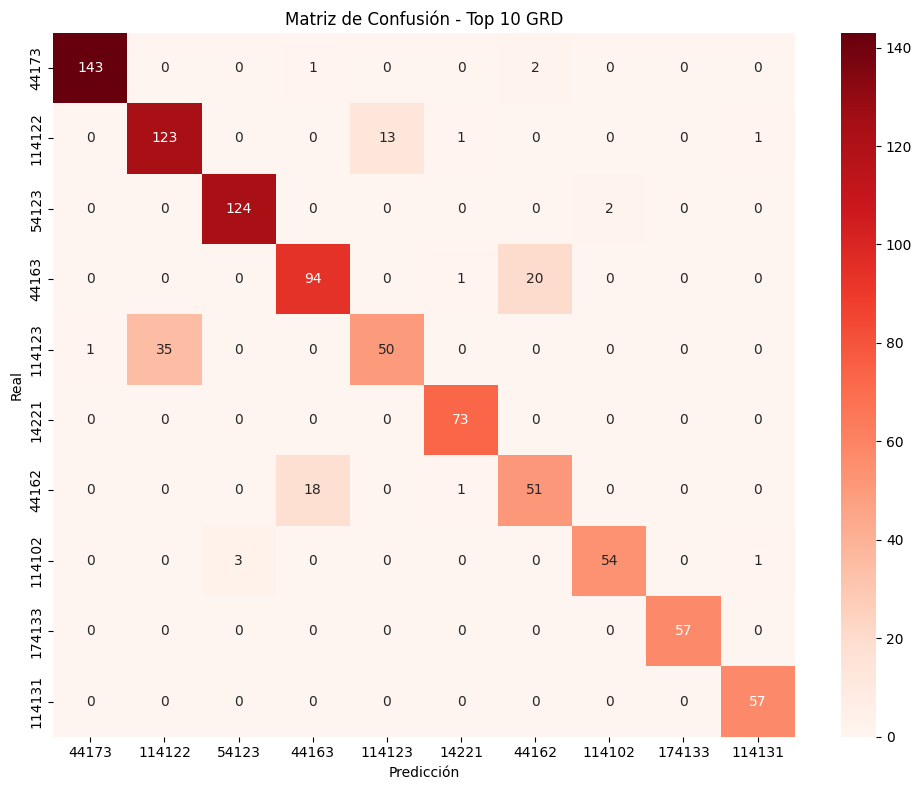

In [46]:
from sklearn.metrics import confusion_matrix
from collections import Counter

# Top 10 clases reales más frecuentes
top_labels = [clase for clase, _ in Counter(y_test).most_common(10)]

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred, labels=top_labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=top_labels, yticklabels=top_labels, cmap="Reds")
plt.title("Matriz de Confusión - Top 10 GRD")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


### Top 10 variables más importantes para el modelo

Se identifican las variables que más peso tienen para el modelo, lo cual ayuda a interpretar los factores más relevantes para la predicción de GRD.


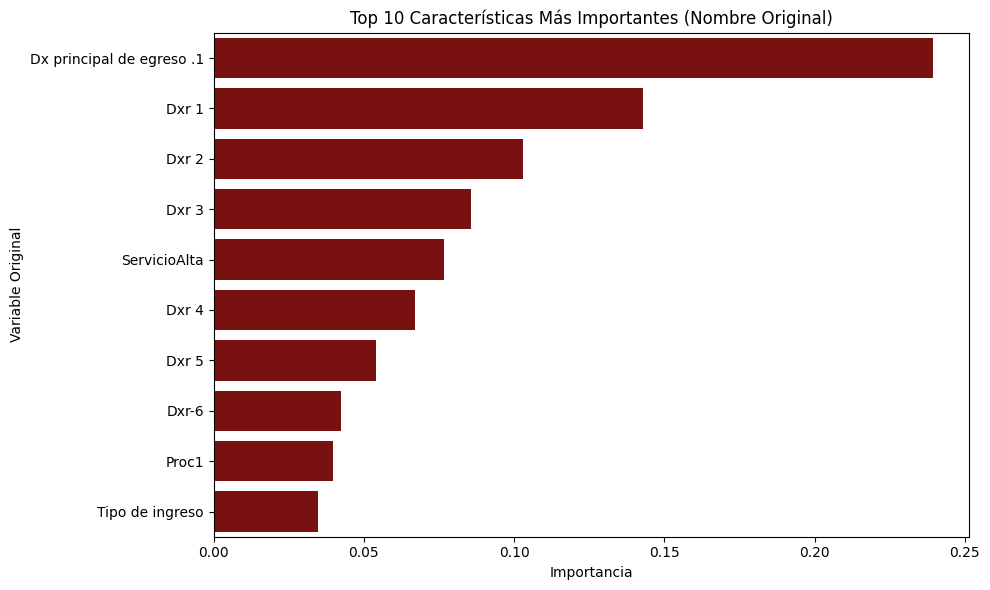

In [48]:
# 1. Calcular la importancia original
importancias = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# 2. Extraer nombre base de la columna (antes del primer "_")
def extraer_columna_original(col):
    # Si la columna es numérica o sin "_", devuélvela tal cual
    if '_' not in col:
        return col
    # Si la columna viene de one-hot, parte antes del último "_"
    return col.rsplit('_', 1)[0]

importancias.index = importancias.index.map(extraer_columna_original)

# 3. Agrupar por nombre original y sumar las importancias
importancias_agrupadas = importancias.groupby(importancias.index).sum()

# 4. Seleccionar el top 10
importancias_top10 = importancias_agrupadas.sort_values(ascending=False).head(10)

# 5. Graficar
plt.figure(figsize=(10, 6))
sns.barplot(
    x=importancias_top10.values,
    y=importancias_top10.index,
    color="#8B0000"
)
plt.title("Top 10 Características Más Importantes (Nombre Original)")
plt.xlabel("Importancia")
plt.ylabel("Variable Original")
plt.tight_layout()
plt.show()


Guardar el modelo entrenado en un archivo .pkl

In [23]:
joblib.dump(rf_model, 'modelo_random_forest.pkl')

['modelo_random_forest.pkl']

Guardar las colunmas originales para la comparacion y orden en el Django

In [25]:
joblib.dump(X_train.columns.tolist(), 'columnas_modelo.pkl')
joblib.dump(rf_model, 'modelo_random_forest.pkl')

['modelo_random_forest.pkl']

##  Conclusiones del Proyecto

En este proyecto se construyó un sistema predictivo capaz de clasificar correctamente los Grupos Relacionados por el Diagnóstico (GRD) con base en datos clínicos y administrativos de pacientes hospitalizados.

### Principales hallazgos:

- Se realizó una limpieza cuidadosa del dataset, eliminando registros con valores nulos en variables críticas y filtrando clases con baja representación.
- Se hizo una exploración estadística descriptiva (EDA), con análisis de tipos de datos, distribución de variables numéricas, identificación de valores nulos y visualización de la variable objetivo.
- El modelo Random Forest alcanzó una **precisión en prueba del 89.2%**, lo cual es bastante alto para una clasificación multiclase.
- La matriz de confusión y el análisis por clase mostraron que el modelo tiene un buen desempeño en las clases más frecuentes, aunque hay clases con menor recall que podrían ser analizadas más a fondo.
- Las variables más influyentes para el modelo fueron [reemplazar aquí con las que te salieron en tu gráfica], lo cual permite una mejor interpretación de los factores que contribuyen a la clasificación GRD.

---

##  Limitaciones y recomendaciones

- El dataset original contenía muchas columnas con valores faltantes o irrelevantes. En futuros trabajos se podría considerar imputar algunos valores en lugar de eliminarlos para conservar más datos.
- Algunas clases GRD tienen muy poca representación y fueron excluidas del análisis. Podría explorarse el uso de técnicas de balanceo como SMOTE o submuestreo.
- El modelo Random Forest funcionó muy bien, pero sería interesante comparar su desempeño con otros modelos como Gradient Boosting o XGBoost.
- No se incluyeron aún variables temporales como estacionalidad, que podrían enriquecer el modelo en análisis futuros.

---

Este análisis demuestra cómo, a partir de un proceso cuidadoso de limpieza, exploración y modelado, es posible construir herramientas predictivas que pueden apoyar la toma de decisiones clínicas o administrativas en contextos hospitalarios.
